In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def get_radar_area(dataframe, col):
    labels = list(dataframe.columns)
    alpha = 360 / len(labels)
    area = 0
    for elem in enumerate(dataframe):
        side = (dataframe[labels[elem[0]]][col], dataframe[labels[(elem[0] + 1) % len(labels)]][col])
        area = area + (0.5 * side[0] * side[1] * math.sin(math.radians(alpha)))
    return area

In [3]:
data_df = pd.read_csv("../data/teaching_skills.csv", index_col="date")
data_df

,pedagogy,communication,adaptation,authority,emotion_management,tolerance,passion,knowledge,creativity,synthesize
date,,,,,,,,,,
2022-september,6,8,7,6,5,9,9,8,6,5


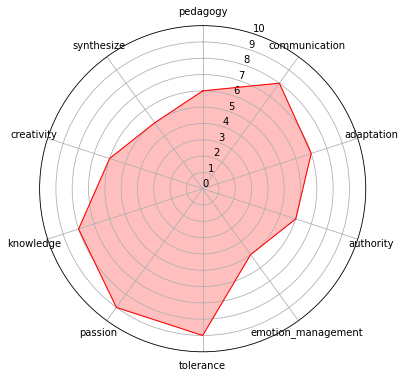

In [4]:
labels = list(data_df.columns)
values = data_df.loc["2022-september"].tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values += values[:1]
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 10)
ax.set_rgrids([e for e in range(11)])
ax.set_rlabel_position(180 / num_vars)
ax.plot(angles, values, color='red', linewidth=1)
ax.fill(angles, values, color='red', alpha=0.25)

In [5]:
area_radar = get_radar_area(data_df, "2022-september")
area_radar

141.65624580248607